# EDA Capstone Project - DataSpark
## Detect file encoding

In [5]:
import chardet

def detect_encoding(file):
    with open(file, 'rb') as file:
        result = chardet.detect(file.read())
        encoding = result['encoding']
        print(f"Detected encoding for {file} : {encoding}")

list_of_csvs=[r'C:\Users\imand\OneDrive\Desktop\CAPSTONE_PROJECT\datasprak\Customers.csv',r'C:\Users\imand\OneDrive\Desktop\CAPSTONE_PROJECT\datasprak\Exchange_rates.csv',r'C:\Users\imand\OneDrive\Desktop\CAPSTONE_PROJECT\datasprak\Products.csv',r'C:\Users\imand\OneDrive\Desktop\CAPSTONE_PROJECT\datasprak\Sales.csv',r'C:\Users\imand\OneDrive\Desktop\CAPSTONE_PROJECT\datasprak\Stores.csv']

for i in list_of_csvs:
    detect_encoding(i)
              

Detected encoding for <_io.BufferedReader name='C:\\Users\\imand\\OneDrive\\Desktop\\CAPSTONE_PROJECT\\datasprak\\Customers.csv'> : Windows-1252
Detected encoding for <_io.BufferedReader name='C:\\Users\\imand\\OneDrive\\Desktop\\CAPSTONE_PROJECT\\datasprak\\Exchange_rates.csv'> : ascii
Detected encoding for <_io.BufferedReader name='C:\\Users\\imand\\OneDrive\\Desktop\\CAPSTONE_PROJECT\\datasprak\\Products.csv'> : ascii
Detected encoding for <_io.BufferedReader name='C:\\Users\\imand\\OneDrive\\Desktop\\CAPSTONE_PROJECT\\datasprak\\Sales.csv'> : ascii
Detected encoding for <_io.BufferedReader name='C:\\Users\\imand\\OneDrive\\Desktop\\CAPSTONE_PROJECT\\datasprak\\Stores.csv'> : utf-8


## EDA 

In [7]:
#File Customers
import pandas as pd
df_customers=pd.DataFrame()
df_customers=pd.read_csv(list_of_csvs[0],encoding='windows-1252')

df_customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [8]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [9]:
#Convert Birthday to Datetime format
df_customers['Birthday']=pd.to_datetime(df_customers['Birthday'], format='%m/%d/%Y')

In [10]:
#check for null values
df_customers.isna().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [11]:
#seeing what the null values are
df_customers[df_customers.isnull().any(axis=1)]


,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,1981-04-18
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,1949-02-24
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,1936-03-14
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,1963-08-06
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1961-01-05
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,1976-08-28
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,1947-11-13
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1940-01-13
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,1977-05-08
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,2000-03-03


In [12]:
#Replacing State Code null values for Naploli as NA as it is the state code for Napoli 
df_customers.fillna('NA',inplace=True)

#removing spaces in column names as it is better for sql
df_customers.columns = df_customers.columns.str.replace(' ', '')

In [13]:
#checking for duplicated values
df_customers.duplicated().sum()

0

In [14]:
#File exchange rates

df_exchange=pd.DataFrame()
df_exchange=pd.read_csv(list_of_csvs[1],encoding='ascii')
df_exchange.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [15]:
df_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [16]:
#Converting Date to date format
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'], format='%m/%d/%Y')

In [17]:
#checking null values
df_exchange.isna().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [18]:
#Checking for duplicates
df_exchange.duplicated().sum()

0

In [19]:
#File Products

df_products=pd.DataFrame()
df_products=pd.read_csv(list_of_csvs[2],encoding='ascii')

df_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [20]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [21]:
df_products.describe()

,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


In [22]:
#Checking for null values
df_products.isna().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [23]:
#checking for duplicate values
df_products.duplicated().sum()

0

In [24]:
#Convert Unit Cost USD and Unit Price USD to float while removing $ and , for computational purposes
df_products['Unit Cost USD'] = df_products['Unit Cost USD'].str.replace(r'[\$,]', '', regex=True).astype(float)
df_products['Unit Price USD'] = df_products['Unit Price USD'].str.replace(r'[\$,]', '', regex=True).astype(float)

In [25]:
#Replacing spaces in column name
df_products.columns = df_products.columns.str.replace(' ', '')

In [26]:
#File Sales

df_sales=pd.DataFrame()
df_sales=pd.read_csv(list_of_csvs[3],encoding='ascii')
df_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [27]:
#Replacing spaces in column name
df_sales.columns = df_sales.columns.str.replace(' ', '')

In [28]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderNumber   62884 non-null  int64 
 1   LineItem      62884 non-null  int64 
 2   OrderDate     62884 non-null  object
 3   DeliveryDate  13165 non-null  object
 4   CustomerKey   62884 non-null  int64 
 5   StoreKey      62884 non-null  int64 
 6   ProductKey    62884 non-null  int64 
 7   Quantity      62884 non-null  int64 
 8   CurrencyCode  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [29]:
df_sales.describe()

,OrderNumber,LineItem,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [30]:
#Checking for null 
df_sales.isna().sum()

OrderNumber         0
LineItem            0
OrderDate           0
DeliveryDate    49719
CustomerKey         0
StoreKey            0
ProductKey          0
Quantity            0
CurrencyCode        0
dtype: int64

In [31]:
#Changin Delivery Date and Order Date to Datetime format for analysis purpose
df_sales['DeliveryDate'] = pd.to_datetime(df_sales['DeliveryDate'], errors='coerce')
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'])

In [32]:
#filling null delivery date values to same day as order date as it was bought in store, doing this only for non-online orders or can ask the company team in real world case
df_sales.loc[
    df_sales['DeliveryDate'].isna() & (df_sales['StoreKey'] != 0), 
    'DeliveryDate'
] = df_sales['OrderDate']

In [33]:
#File Stores

df_stores=pd.DataFrame()
df_stores=pd.read_csv(list_of_csvs[4],encoding='utf-8')

df_stores.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [34]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [35]:
df_stores.describe()

,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


In [36]:
#checking null values
df_stores.isna().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [37]:
#null values are for online as there is no square meters for it
#repalcing with 0
df_stores.fillna(0,inplace=True)

In [38]:
#Replacing spaces in column name
df_stores.columns = df_stores.columns.str.replace(' ', '')

In [39]:
df_stores['OpenDate'] = pd.to_datetime(df_stores['OpenDate'])

In [40]:
# Further EDA

In [41]:
#Calculating birthday, age range, and store age

from datetime import datetime
def calculate_age(birthday):
    today = datetime.now()
    age = today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))
    return age
    
#Creating copy as we would need original celaning data to input into sql, table wise

df_customers_copy=df_customers
df_customers_copy['Age'] = df_customers_copy['Birthday'].apply(calculate_age)

def agerange(age):
    if age < 10:
        return 'Under 10'
    elif age < 20:
        return '10-19'
    elif age < 30:
        return '20-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    elif age < 60:
        return '50-59'
    else:
        return '60 and above'

df_customers_copy['AgeRange'] = df_customers_copy['Age'].apply(agerange)

df_stores_copy=df_stores

df_stores_copy['StoreAge']=df_stores_copy['OpenDate'].apply(calculate_age)


In [42]:
df_customers_copy.head()

,CustomerKey,Gender,Name,City,StateCode,State,ZipCode,Country,Continent,Birthday,Age,AgeRange
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,85,60 and above
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,45,40-49
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,77,60 and above
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,67,60 and above
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58,50-59


In [43]:
df_stores_copy.head()

,StoreKey,Country,State,SquareMeters,OpenDate,StoreAge
0,1,Australia,Australian Capital Territory,595.0,2008-01-01,16
1,2,Australia,Northern Territory,665.0,2008-01-12,16
2,3,Australia,South Australia,2000.0,2012-01-07,12
3,4,Australia,Tasmania,2000.0,2010-01-01,14
4,5,Australia,Victoria,2000.0,2015-12-09,8


In [44]:
#Renaming columns in customers and stores as they have some location column names
df_customers_copy.rename(columns={
    'City': 'City_customer',
    'StateCode': 'StateCode_customer',
    'State': 'State_customer',
    'ZipCode': 'ZipCode_customer',
    'Country': 'Country_customer',
    'Continent': 'Continent_customer'
}, inplace=True)

df_stores_copy.rename(columns={'Country':'Country_store','State':'State_store'},inplace=True)

In [45]:
#Merging Data

df_SalesandStoreMerged = pd.merge(df_sales, df_stores_copy, on='StoreKey', how='left')
df_SalesandStoreMerged.head()

,OrderNumber,LineItem,OrderDate,DeliveryDate,CustomerKey,StoreKey,ProductKey,Quantity,CurrencyCode,Country_store,State_store,SquareMeters,OpenDate,StoreAge
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,Canada,Nunavut,1210.0,2015-04-04,9
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Online,Online,0.0,2010-01-01,14
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Online,Online,0.0,2010-01-01,14
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Online,Online,0.0,2010-01-01,14
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Online,Online,0.0,2010-01-01,14


In [46]:
df_SalesStoresProductsMerged = pd.merge(df_SalesandStoreMerged, df_products, on='ProductKey', how='left')

In [47]:
df_SalesStoresProductsCustomersMerged = pd.merge(df_SalesStoresProductsMerged, df_customers_copy, on='CustomerKey', how='left')

In [48]:
df_finalMerged = pd.merge(df_SalesStoresProductsCustomersMerged, df_exchange,
                     left_on=['OrderDate','CurrencyCode'],
                     right_on=['Date','Currency'],
                     how='left')

In [49]:
df_finalMerged.drop(columns=['Date', 'Currency'],inplace=True)

In [50]:
df_finalMerged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderNumber         62884 non-null  int64         
 1   LineItem            62884 non-null  int64         
 2   OrderDate           62884 non-null  datetime64[ns]
 3   DeliveryDate        62884 non-null  datetime64[ns]
 4   CustomerKey         62884 non-null  int64         
 5   StoreKey            62884 non-null  int64         
 6   ProductKey          62884 non-null  int64         
 7   Quantity            62884 non-null  int64         
 8   CurrencyCode        62884 non-null  object        
 9   Country_store       62884 non-null  object        
 10  State_store         62884 non-null  object        
 11  SquareMeters        62884 non-null  float64       
 12  OpenDate            62884 non-null  datetime64[ns]
 13  StoreAge            62884 non-null  int64     

In [51]:
#Calculating Reveunue Per Customer USD and Profit Per CustomerUSD
df_finalMerged['RevenueUSD'] = df_finalMerged['Quantity'] * df_finalMerged['UnitPriceUSD']
df_finalMerged['ProfitUSD'] = df_finalMerged['RevenueUSD']-(df_finalMerged['Quantity'] * df_finalMerged['UnitCostUSD'])

In [52]:
#Creating a Frequency Column to the data

# Count the number of orders per customer
order_counts = df_finalMerged.groupby('CustomerKey')['OrderNumber'].count()

# function to Categorize frequency
def categorize_frequency(count):
    if count >= 1 and count <= 4:
        return 'Occasional'
    elif count >= 5 and count <= 10:
        return 'Moderate'
    elif count > 10:
        return 'Frequent'
    else:
        return 'Unknown'

# Apply categorization to get a Series of categories
order_counts_category = order_counts.apply(categorize_frequency)

# Merge this frequency information back into the original DataFrame
# Reset index to merge
order_counts_category = order_counts_category.reset_index(name='Frequency')

# Merge with the original DataFrame
df_finalMerged = df_finalMerged.merge(order_counts_category, on='CustomerKey', how='left')

In [53]:
pd.set_option('display.max_columns', None)
df_finalMerged.head(1)

,OrderNumber,LineItem,OrderDate,DeliveryDate,CustomerKey,StoreKey,ProductKey,Quantity,CurrencyCode,Country_store,State_store,SquareMeters,OpenDate,StoreAge,ProductName,Brand,Color,UnitCostUSD,UnitPriceUSD,SubcategoryKey,Subcategory,CategoryKey,Category,Gender,Name,City_customer,StateCode_customer,State_customer,ZipCode_customer,Country_customer,Continent_customer,Birthday,Age,AgeRange,Exchange,RevenueUSD,ProfitUSD,Frequency
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,Canada,Nunavut,1210.0,2015-04-04,9,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,1971-03-23,53,50-59,1.3884,68.0,36.73,Moderate


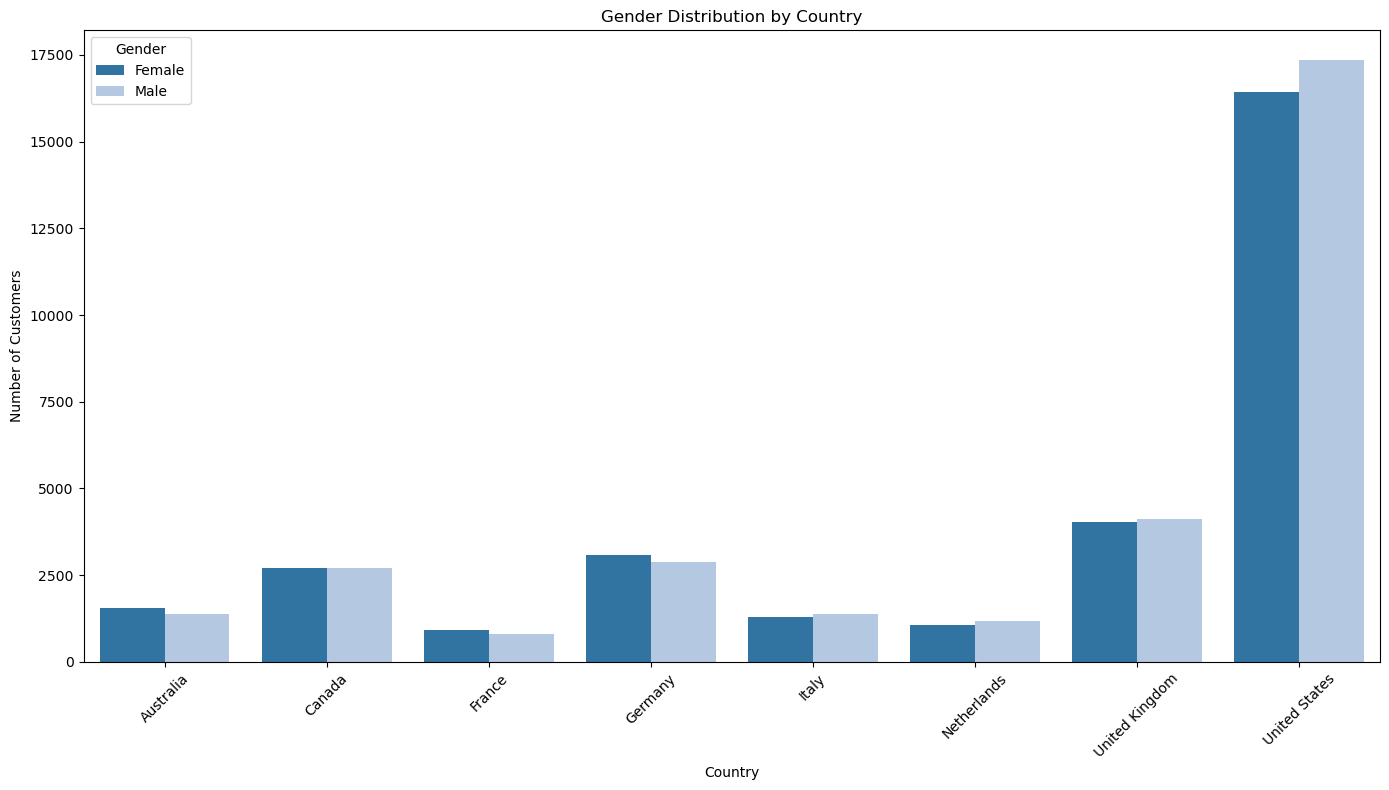

In [54]:
#Plotting total customers gender wise split in country

import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each gender within each country
gender_counts = df_finalMerged.groupby(['Country_customer', 'Gender']).size().reset_index(name='Count')

# Plotting gender distribution within each country
plt.figure(figsize=(14, 8))
sns.barplot(data=gender_counts, x='Country_customer', y='Count', hue='Gender',palette='tab20')
plt.title('Gender Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

There is no notable variation in customer distribution across different gender categories. However, the United States has the highest number of customers compared to other countries.

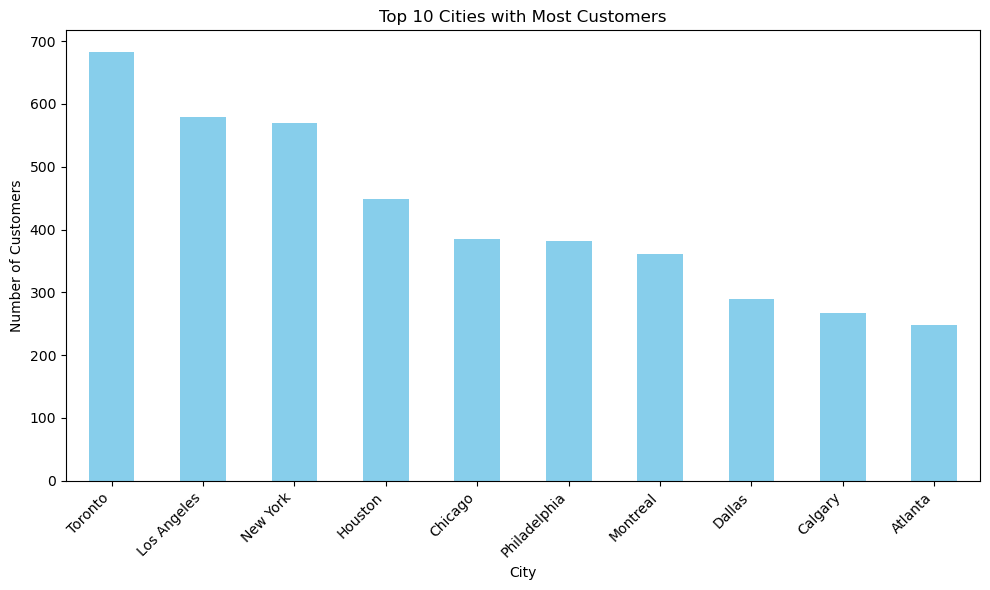

In [56]:
#Finding top 10 City with most customers

customer_counts = df_finalMerged['City_customer'].value_counts()

#Geting the top 10 cities
top_10_cities = customer_counts.head(10)

#Plotting the top 10 cities with the most customers
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Top 10 Cities with Most Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts plot to fit labels

# Show plot
plt.show()

Based on the analysis, it is evident that several cities in the United States rank among the top ten cities with the highest number of customers. Notably, Toronto leads the list, followed by Montreal and Calgary, indicating a significant interest in our products within these Canadian cities as well.

C:\Users\imand\AppData\Local\Temp\ipykernel_6216\2873521230.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_cities_profits, x='City_customer', y='ProfitUSD', palette='viridis')


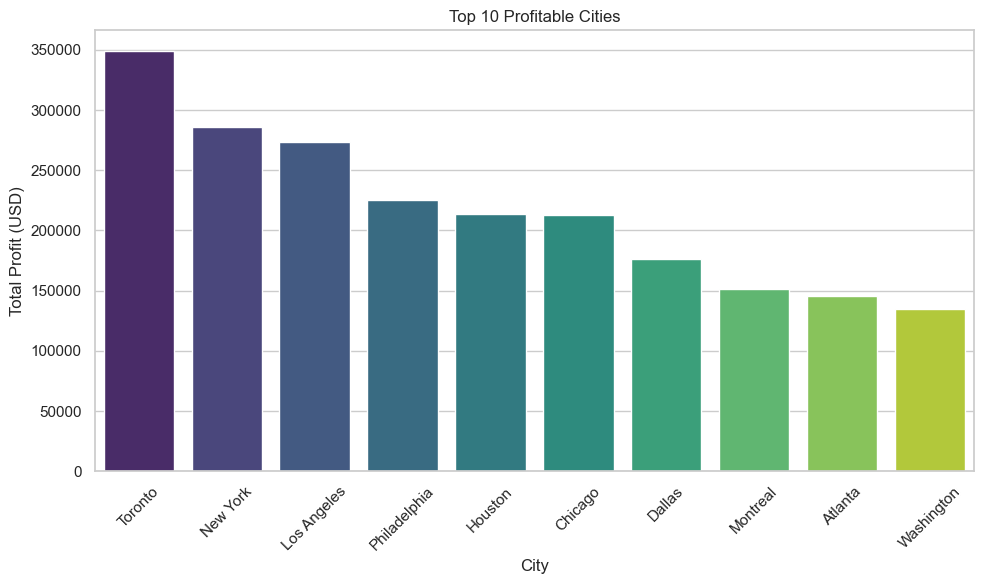

In [58]:
# Calculating profits by City
city_profits = df_finalMerged.groupby(['City_customer'])['ProfitUSD'].sum().sort_values(ascending=False)

# Convert to DataFrame for better readability
city_profits_df = city_profits.reset_index()

top10_cities_profits = city_profits_df.head(10)

# Set plot style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a barplot
sns.barplot(data=top10_cities_profits, x='City_customer', y='ProfitUSD', palette='viridis')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Profit (USD)')
plt.title('Top 10 Profitable Cities')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

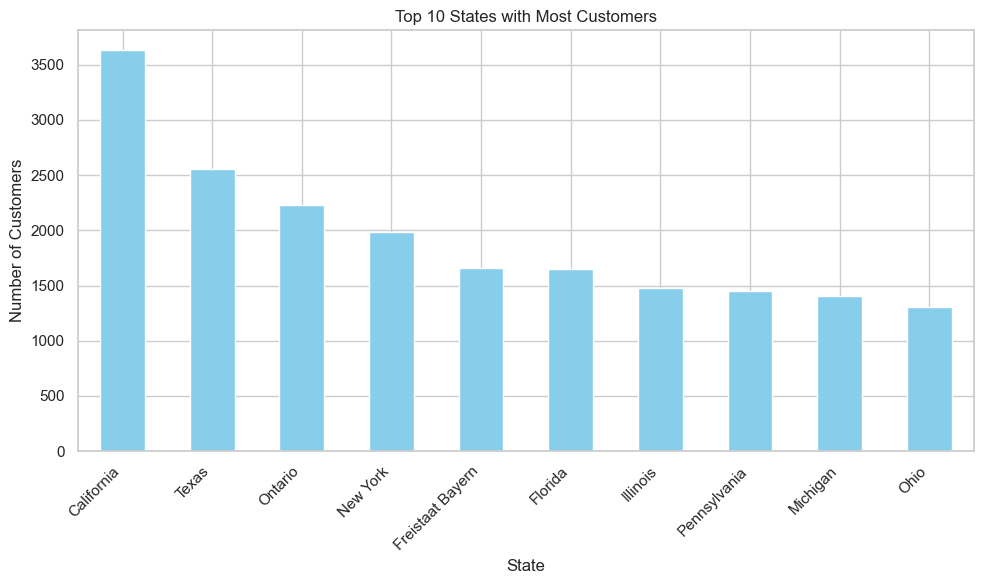

In [59]:
#Top 10 regions statewise for most number of Customers

customer_counts = df_finalMerged['State_customer'].value_counts()

#Geting the top 10 states
top_10_states = customer_counts.head(10)

#Plotting the top 10 cities with the most customers
plt.figure(figsize=(10, 6))
top_10_states.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('Top 10 States with Most Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts plot to fit labels

# Show plot
plt.show()

C:\Users\imand\AppData\Local\Temp\ipykernel_6216\2753805304.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_states_profits, x='State_customer', y='ProfitUSD', palette='viridis')


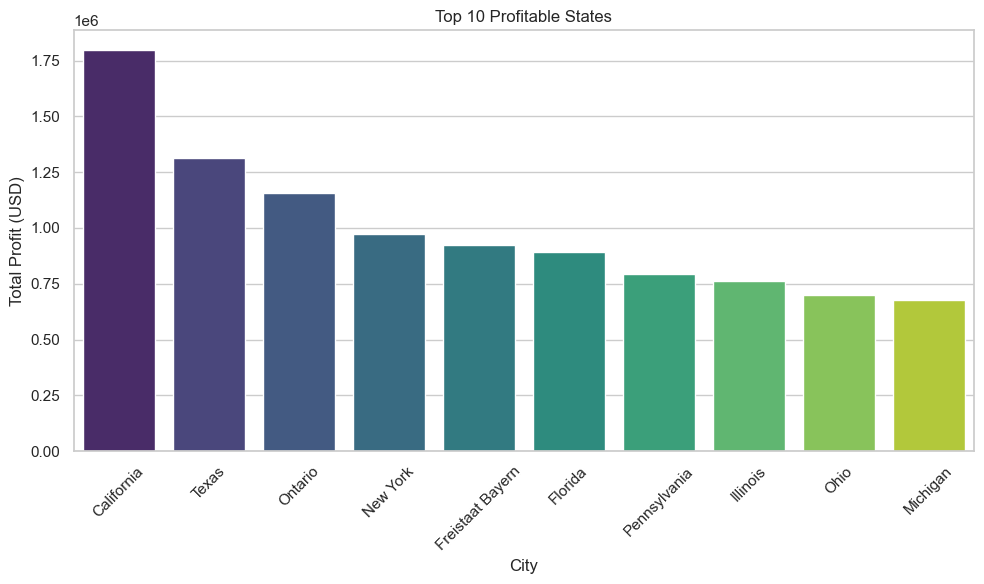

In [60]:
# Calculating profits by State
state_profits = df_finalMerged.groupby(['State_customer'])['ProfitUSD'].sum().sort_values(ascending=False)

# Convert to DataFrame for better readability
state_profits_df = state_profits.reset_index()

top10_states_profits = state_profits_df.head(10)

# Set plot style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create a barplot
sns.barplot(data=top10_states_profits, x='State_customer', y='ProfitUSD', palette='viridis')

# Add labels and title
plt.xlabel('City')
plt.ylabel('Total Profit (USD)')
plt.title('Top 10 Profitable States')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

This shows strong customer bases in major U.S. states, as well as significant interest from Canada and Germany. It provides valuable insights into market concentration and potential areas for targeted engagement and expansion.

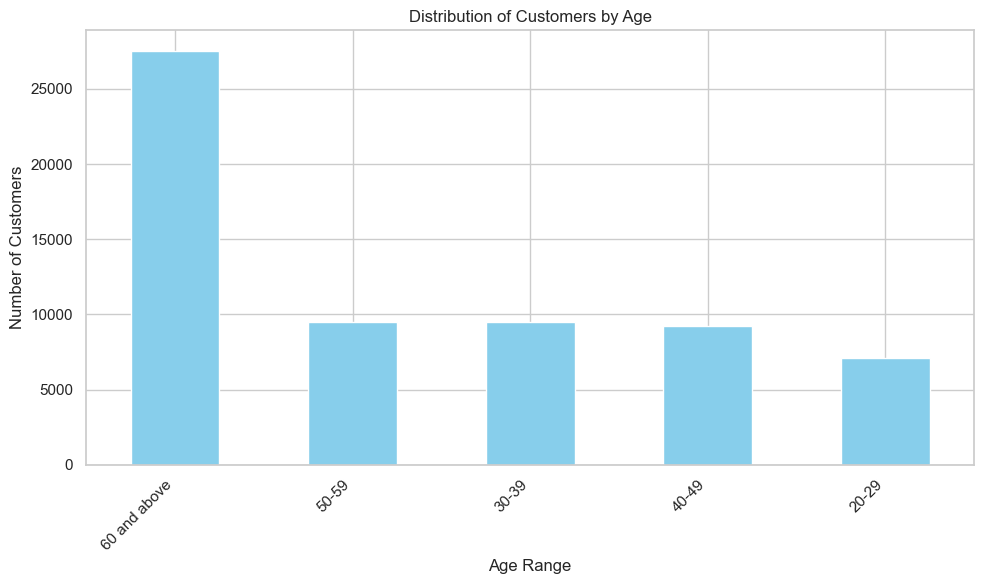

In [62]:
#Seeing Age group as well

ageRange_counts = df_finalMerged['AgeRange'].value_counts()

#Plotting distribution of customers by Age
plt.figure(figsize=(10, 6))
ageRange_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Age Range')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts plot to fit labels

# Show plot
plt.show()

In [63]:
# Calculating profits by AgeRange
agerange_profits = df_finalMerged.groupby(['AgeRange'])['ProfitUSD'].sum().sort_values(ascending=False)
agerange_profits

AgeRange
60 and above    14272531.10
30-39            5045855.11
50-59            4926702.05
40-49            4814376.84
20-29            3603223.28
Name: ProfitUSD, dtype: float64

The analysis reveals that the majority of customers are aged 60 and above. This demographic trend suggests a significant interest and engagement from older adults, which may influence product preferences and marketing strategies. Targeting this age group with tailored offerings and communications could enhance customer satisfaction and retention.

In [65]:
#Seeing Frequency group as well 

df_finalMerged['Frequency'].value_counts()

Frequency
Moderate      29903
Frequent      17288
Occasional    15693
Name: count, dtype: int64

In [66]:
#Calculating Profits by Frequency Range
freq_profits = df_finalMerged.groupby(['Frequency'])['ProfitUSD'].sum().sort_values(ascending=False)
freq_profits

Frequency
Moderate      15766046.80
Frequent       8849080.35
Occasional     8047561.23
Name: ProfitUSD, dtype: float64

Understanding the frequency of customer visits enables us to tailor our advertising strategies more effectively. By categorizing customers based on their engagement levels, we can create targeted marketing campaigns that resonate with different segments, thereby enhancing customer engagement and optimizing our advertising efforts.

In [68]:
#Seeing top currencies used as well
df_finalMerged['CurrencyCode'].value_counts()

CurrencyCode
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64

We can infer that most customers use USD, with significant numbers also using EUR and GBP indicating their region as well. Also, there is notable interest from Canadian and Australian markets, indicating a diverse international customer base.

In [70]:
#Seeing if there is any co-relation between currency exchange rates and revenue

# Initialize an empty list to store correlation results
correlation_results = []

# Group by Currency and calculate correlation for each group
for currency, group in df_finalMerged.groupby('CurrencyCode'):
    correlation = group[['RevenueUSD', 'Exchange']].corr().iloc[0, 1]
    correlation_results.append({
        'Currency': currency,
        'Correlation': correlation
    })

# Convert results to a DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Display the correlation results
print("Correlation between RevenueUSD and ExchangeRateOnThatDate by Currency:")
print(correlation_results_df)

Correlation between RevenueUSD and ExchangeRateOnThatDate by Currency:
  Currency  Correlation
0      AUD     0.007797
1      CAD    -0.015094
2      EUR    -0.018534
3      GBP    -0.002628
4      USD          NaN


The correlations for all currencies are extremely low, indicating that changes in exchange rates for AUD, CAD, EUR, and GBP have minimal to no effect on revenue in USD.

In [72]:
#Finding top 10 Products Sold

product_counts = df_finalMerged['ProductName'].value_counts()

print(product_counts.nlargest(10))


ProductName
Adventure Works Desktop PC2.30 MD230 Black    162
WWI Desktop PC1.60 E1600 Black                158
Adventure Works Desktop PC2.30 MD230 White    158
WWI Desktop PC1.80 E1800 White                158
WWI Desktop PC1.80 E1801 Black                157
WWI Desktop PC1.60 E1600 Silver               156
Adventure Works Desktop PC1.80 ED180 White    156
WWI Desktop PC1.80 E1800 Silver               156
Adventure Works Desktop PC1.60 ED160 Black    155
WWI Desktop PC2.33 X2330 Black                154
Name: count, dtype: int64


In [73]:
#Finding top 10 Profitable Products
product_profits = df_finalMerged.groupby(['ProductName'])['ProfitUSD'].sum().sort_values(ascending=False)

print(product_profits.nlargest(10))


ProductName
WWI Desktop PC2.33 X2330 Black                 337986.00
Adventure Works Desktop PC2.33 XD233 Silver    311663.95
Adventure Works Desktop PC2.33 XD233 Brown     310368.05
Adventure Works Desktop PC2.33 XD233 Black     299352.90
Adventure Works Desktop PC2.33 XD233 White     292225.45
WWI Desktop PC2.33 X2330 White                 283908.24
WWI Desktop PC2.33 X2330 Brown                 282679.20
Adventure Works 52" LCD HDTV X590 White        263727.12
Adventure Works 52" LCD HDTV X590 Black        250152.93
WWI Desktop PC2.33 X2330 Silver                240891.84
Name: ProfitUSD, dtype: float64


The top products purchased by customers are Computer Products.
We can further look into top brands as category as well.

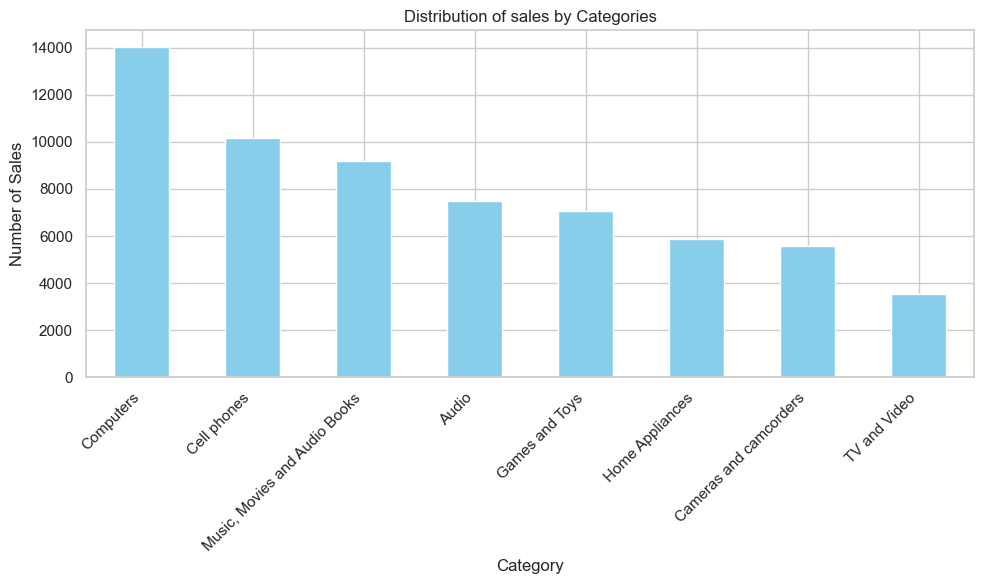

In [75]:
#Finding top Categories sold

category_counts = df_finalMerged['Category'].value_counts()

#Plotting the top categories with the most customers
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Sales')
plt.title('Distribution of sales by Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts plot to fit labels

# Show plot
plt.show()

In [76]:
# Calculating profits by Category
category_profits = df_finalMerged.groupby(['Category'])['ProfitUSD'].sum().sort_values(ascending=False)

category_profits

Category
Computers                        11277447.90
Home Appliances                   6296338.85
Cameras and camcorders            3919800.99
TV and Video                      3536694.39
Cell phones                       3498626.54
Music, Movies and Audio Books     1909259.17
Audio                             1827851.77
Games and Toys                     396668.77
Name: ProfitUSD, dtype: float64

This distribution indicates a strong demand for both technology, entertainment, and recreational-related products while also showing demand for household items.
Understanding these preferences can guide inventory management, targeted marketing efforts, and product development strategies to better align with customer interests and enhance engagement.

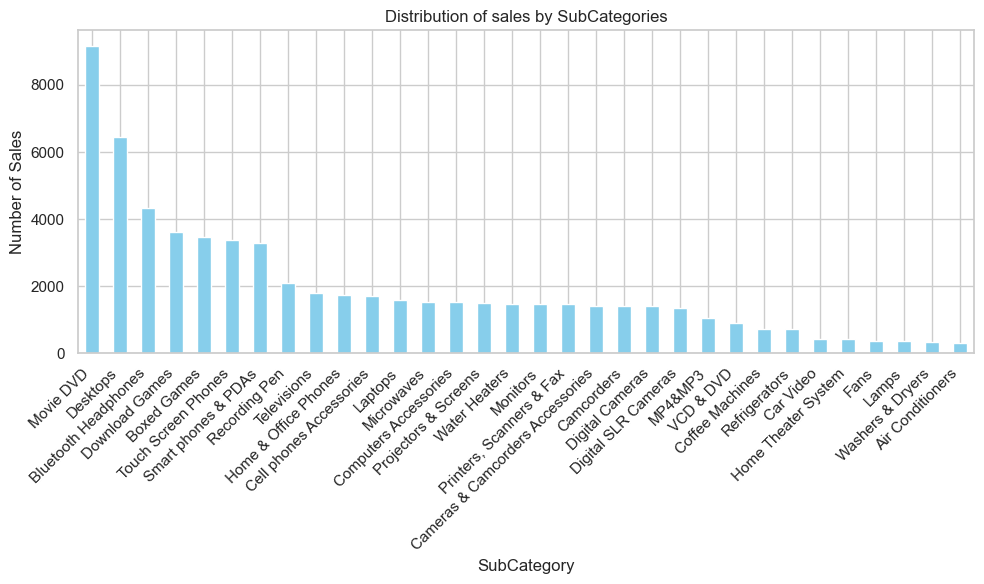

In [78]:
#Distribution of subcategories sold

subcategory_counts = df_finalMerged['Subcategory'].value_counts()

#Plotting subcategories and sales
plt.figure(figsize=(10, 6))
subcategory_counts.plot(kind='bar', color='skyblue')
plt.xlabel('SubCategory')
plt.ylabel('Number of Sales')
plt.title('Distribution of sales by SubCategories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts plot to fit labels

# Show plot
plt.show()

In [79]:
# Calculating profits by SubCategory
subcategory_profits = df_finalMerged.groupby(['Subcategory'])['ProfitUSD'].sum().sort_values(ascending=False)
subcategory_profits

Subcategory
Desktops                            5629155.33
Televisions                         2631908.38
Projectors & Screens                2357342.37
Water Heaters                       2039982.30
Camcorders                          2018119.70
Movie DVD                           1909259.17
Laptops                             1793677.71
Touch Screen Phones                 1738593.81
Smart phones & PDAs                 1590479.02
Refrigerators                       1316366.73
Washers & Dryers                    1197517.99
Digital SLR Cameras                 1170056.98
Monitors                             950021.49
Bluetooth Headphones                 806865.02
Recording Pen                        741086.69
Coffee Machines                      692610.86
Microwaves                           650954.38
Digital Cameras                      510597.56
Printers, Scanners & Fax             428520.56
Home Theater System                  398020.77
Download Games                       344731.16
C

By analyzing the top and least-performing subcategories, we gain a clear understanding of where the strengths and opportunities lie. 

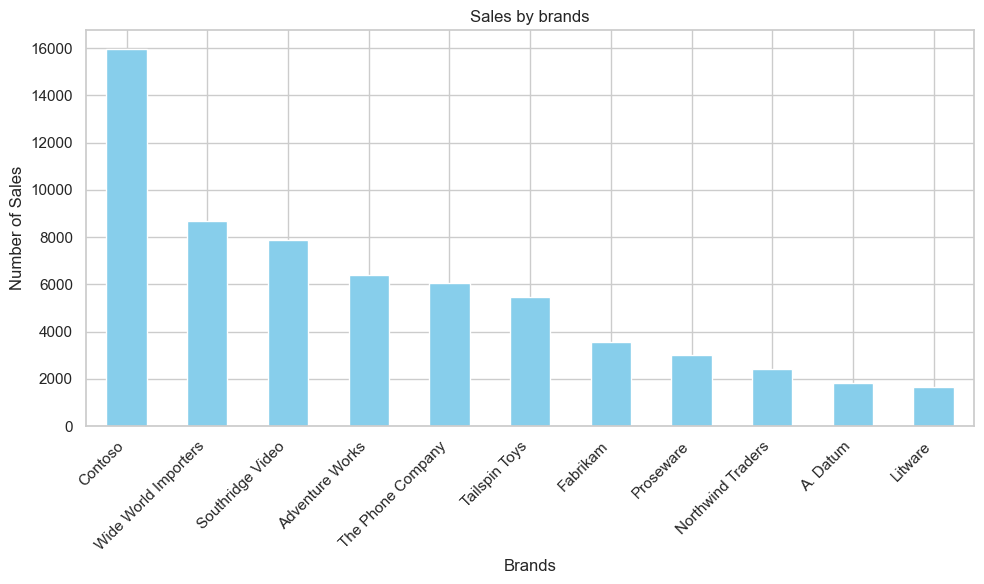

In [81]:
#Distribution of brands sold

brand_counts = df_finalMerged['Brand'].value_counts()
#Plotting brands and sales
plt.figure(figsize=(10, 6))
brand_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Brands')
plt.ylabel('Number of Sales')
plt.title('Sales by brands')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjusts plot to fit labels

# Show plot
plt.show()

In [82]:
# Calculating profits by Brands
brand_profits = df_finalMerged.groupby(['Brand'])['ProfitUSD'].sum().sort_values(ascending=False)
brand_profits

Brand
Adventure Works         6937318.88
Contoso                 6321209.14
Wide World Importers    5367028.30
Fabrikam                4061475.11
The Phone Company       3057762.90
Proseware               1935287.10
Litware                 1553765.19
Southridge Video        1522876.84
A. Datum                 883502.31
Northwind Traders        649413.31
Tailspin Toys            373049.30
Name: ProfitUSD, dtype: float64

Likewise with brands, by analyzing the top and least-performing brands, we gain a clear understanding of where the strengths and opportunities lie. 

              SquareMeters  StoreAge  RevenueUSD
SquareMeters      1.000000  0.289560    0.001338
StoreAge          0.289560  1.000000   -0.004518
RevenueUSD        0.001338 -0.004518    1.000000


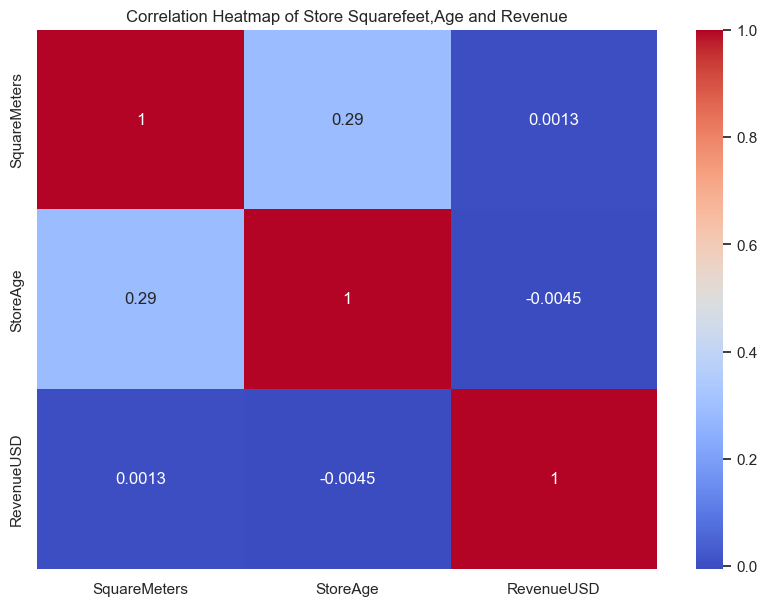

In [84]:
# Can see if store size and age have any co-relation to revenue

filtered_df = df_finalMerged[(df_finalMerged['SquareMeters'] != 0) & (df_finalMerged['StoreAge'] != 0)]

correlation_matrix = filtered_df[['SquareMeters', 'StoreAge', 'RevenueUSD']].corr()

print(correlation_matrix)

plt.figure(figsize=(10, 7))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add titles and labels
plt.title('Correlation Heatmap of Store Squarefeet,Age and Revenue')
plt.show()

Clearly there is no co-relation between the RevenueUSD and StoreAge and StoreSquarefeet

In [86]:
# Can see Store with Most Revenue and it's Location

# Group by StoreKey,Country,State and sum the ProfitUSD
store_profit = df_finalMerged.groupby(['StoreKey', 'Country_store','State_store'])['ProfitUSD'].sum()

# Sort the stores by profit in descending order
top_stores = store_profit.sort_values(ascending=False).head(50)

# Convert to DataFrame for better readability
top_stores_df = top_stores.reset_index()

# Display results
print(top_stores_df)

    StoreKey   Country_store                   State_store   ProfitUSD
0          0          Online                        Online  6672692.64
1         55   United States                        Nevada   830551.75
2         50   United States                        Kansas   819659.12
3         54   United States                      Nebraska   810300.06
4         57   United States                    New Mexico   784095.76
5          9          Canada         Northwest Territories   774757.55
6         61   United States                South Carolina   764997.20
7         45   United States                   Connecticut   761271.82
8         59   United States                        Oregon   754702.32
9         64   United States                 Washington DC   745283.99
10        43   United States                        Alaska   741093.00
11        66   United States                       Wyoming   723190.21
12         8          Canada     Newfoundland and Labrador   723081.21
13    

Online Store is the highest performer by itself by a significant margin, with a profit of $6,672,692.64. This indicates that the online store has the highest profitability compared to physical stores.
It also shows that majority of profits made from physical stores are located in USA with Canada being in the picture as well especially from the Northwest Territories.
But it is important to note that the profits made from Online are the highest.

In [88]:
#Find average profits by day,week,month,year

# Group by 'Order Date' and calculate total revenue per day
daily_revenue = df_finalMerged.groupby('OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per day
average_daily_revenue = daily_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Day: ${average_daily_revenue:.2f}')

# Resample by week and calculate total revenue per month
weekly_revenue = df_finalMerged.resample('W', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per week
average_weekly_revenue = weekly_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Week: ${average_weekly_revenue:.2f}')

# Resample by month and calculate total revenue per month
monthly_revenue = df_finalMerged.resample('M', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per month, taking median as it may have outliers
average_monthly_revenue = monthly_revenue['RevenueUSD'].median()
print(f'Average Revenue Per Month: ${average_monthly_revenue:.2f}')

# Resample by year and calculate total revenue per year
yearly_revenue = df_finalMerged.resample('Y', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Calculate the average revenue per year
average_yearly_revenue = yearly_revenue['RevenueUSD'].mean()
print(f'Average Revenue Per Year: ${average_yearly_revenue:.2f}')


Average Revenue Per Day: $26792.28
Average Revenue Per Week: $160329.93
Average Revenue Per Month: $672552.73
Average Revenue Per Year: $9292579.93


C:\Users\imand\AppData\Local\Temp\ipykernel_6216\2790816349.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_finalMerged.resample('M', on='OrderDate')['RevenueUSD'].sum().reset_index()
C:\Users\imand\AppData\Local\Temp\ipykernel_6216\2790816349.py:25: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_revenue = df_finalMerged.resample('Y', on='OrderDate')['RevenueUSD'].sum().reset_index()


C:\Users\imand\AppData\Local\Temp\ipykernel_6216\1516916552.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df_finalMerged.resample('M', on='OrderDate')['RevenueUSD'].sum().reset_index()


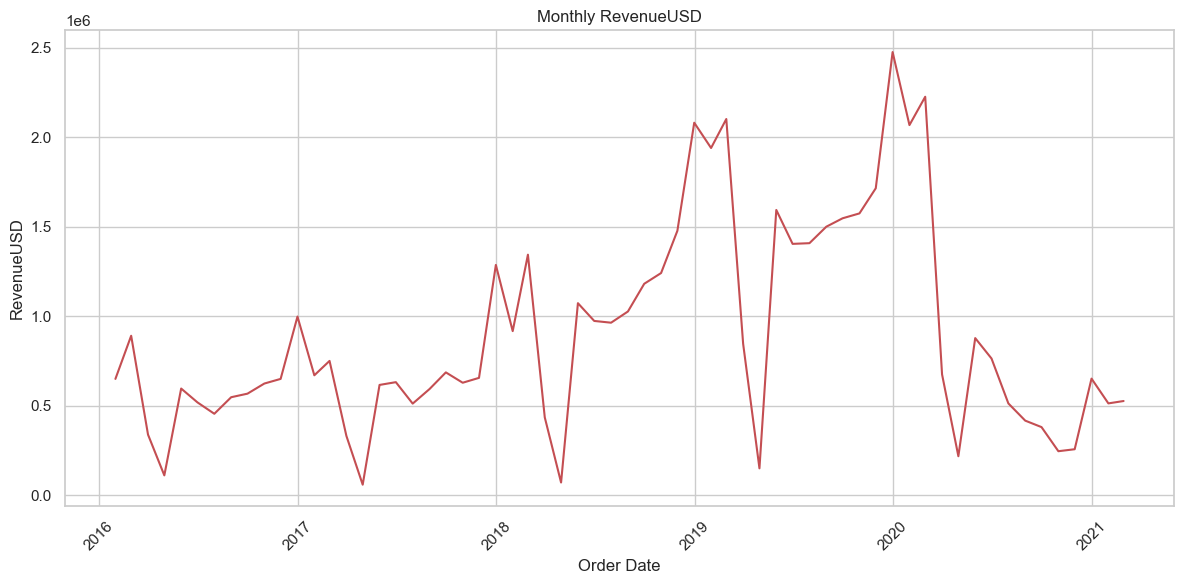

In [89]:
# Resample by month and calculate total revenue
monthly_revenue = df_finalMerged.resample('M', on='OrderDate')['RevenueUSD'].sum().reset_index()

# Monthly Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['OrderDate'], monthly_revenue['RevenueUSD'], linestyle='-', color='r')
plt.title('Monthly RevenueUSD')
plt.xlabel('Order Date')
plt.ylabel('RevenueUSD')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [90]:
#We want to calculate revenue for each month to see trends

# Extract month from the OrderDate
df_finalMerged['Month'] = df_finalMerged['OrderDate'].dt.month

# Filter data for April (Month 4)
for i in range(1,13):
    month_data = df_finalMerged[df_finalMerged['Month'] == i]

    # Calculate total revenue for the month
    total_revenue_month = month_data['RevenueUSD'].sum()

    print(f'Total Revenue for Month {i}: ${total_revenue_month:,.2f}')


Total Revenue for Month 1: $6,759,981.20
Total Revenue for Month 2: $7,842,476.23
Total Revenue for Month 3: $2,625,522.85
Total Revenue for Month 4: $607,334.05
Total Revenue for Month 5: $4,757,983.80
Total Revenue for Month 6: $4,293,036.54
Total Revenue for Month 7: $3,852,415.81
Total Revenue for Month 8: $4,085,169.32
Total Revenue for Month 9: $4,363,863.61
Total Revenue for Month 10: $4,315,027.44
Total Revenue for Month 11: $4,756,059.88
Total Revenue for Month 12: $7,496,608.86


Can infer that lowest performing month is April with the top 3 being December, January, and February 

## Write to Mysql 

In [93]:
import sqlite3

# Connect to SQLite database (creates the database if it doesn't exist)
conn = sqlite3.connect('DataSpark.db')
print("Database 'DataSpark.db' created and connected successfully.")

# Close the connection after creating the database
conn.close()


Database 'DataSpark.db' created and connected successfully.


In [94]:
import sqlite3
import pandas as pd

# Sample DataFrames for demonstration (Replace these with your actual DataFrames)
df_customers = pd.DataFrame({
    'CustomerKey': [1, 2],
    'Gender': ['M', 'F'],
    'Name': ['John Doe', 'Jane Smith'],
    'City_customer': ['New York', 'Los Angeles'],
    'StateCode_customer': ['NY', 'CA'],
    'State_customer': ['New York', 'California'],
    'ZipCode_customer': ['10001', '90001'],
    'Country_customer': ['USA', 'USA'],
    'Continent_customer': ['North America', 'North America'],
    'Birthday': ['1990-01-01', '1985-05-05'],  # Sample strings for illustration
    'Age': [34, 39],
    'AgeRange': ['Unknown', 'Unknown']
})

df_exchange = pd.DataFrame({
    'Date': ['2024-01-01', '2024-01-02'],  # Sample strings for illustration
    'Currency': ['USD', 'EUR'],
    'Exchange': [1.0, 0.9]
})

df_sales = pd.DataFrame({
    'OrderNumber': [1, 2],
    'LineItem': [1, 1],
    'OrderDate': ['2024-01-01', '2024-01-02'],  # Sample strings for illustration
    'DeliveryDate': ['2024-01-02', '2024-01-03'],
    'CustomerKey': [1, 2],
    'StoreKey': [1, 2],
    'ProductKey': [1, 2],
    'Quantity': [1, 2],
    'CurrencyCode': ['USD', 'EUR']
})

df_stores = pd.DataFrame({
    'StoreKey': [1, 2],
    'Country': ['USA', 'USA'],
    'State': ['NY', 'CA'],
    'SquareMeters': [1000, 2000],
    'OpenDate': ['2020-01-01', '2021-01-01']  # Sample strings for illustration
})

# Convert date columns to datetime
df_customers['Birthday'] = pd.to_datetime(df_customers['Birthday'], errors='coerce')
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'], errors='coerce')
df_sales['OrderDate'] = pd.to_datetime(df_sales['OrderDate'], errors='coerce')
df_sales['DeliveryDate'] = pd.to_datetime(df_sales['DeliveryDate'], errors='coerce')
df_stores['OpenDate'] = pd.to_datetime(df_stores['OpenDate'], errors='coerce')

# Check if any date conversions resulted in NaT (Not a Time)
print(df_customers.isnull().sum())
print(df_exchange.isnull().sum())
print(df_sales.isnull().sum())
print(df_stores.isnull().sum())

# Ensure date columns are in string format before inserting into SQLite
df_customers['Birthday'] = df_customers['Birthday'].dt.strftime('%Y-%m-%d')
df_exchange['Date'] = df_exchange['Date'].dt.strftime('%Y-%m-%d')
df_sales['OrderDate'] = df_sales['OrderDate'].dt.strftime('%Y-%m-%d')
df_sales['DeliveryDate'] = df_sales['DeliveryDate'].dt.strftime('%Y-%m-%d')
df_stores['OpenDate'] = df_stores['OpenDate'].dt.strftime('%Y-%m-%d')

# Connect to the DataSpark database
with sqlite3.connect('DataSpark.db') as conn:
    cursor = conn.cursor()

    # Create the Customers table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Customers (
        CustomerKey INT PRIMARY KEY,
        Gender TEXT,
        Name TEXT,
        City TEXT,
        StateCode TEXT,
        State TEXT,
        ZipCode TEXT,
        Country TEXT,
        Continent TEXT,
        Birthday DATE,
        Age INT,
        AgeRange TEXT
    )
    ''')

    # Insert Customer data
    for _, row in df_customers.iterrows():
        cursor.execute('''
            INSERT OR IGNORE INTO Customers (CustomerKey, Gender, Name, City, StateCode, State, ZipCode, Country, Continent, Birthday, Age, AgeRange)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (row['CustomerKey'], row['Gender'], row['Name'], row['City_customer'], row['StateCode_customer'], row['State_customer'], row['ZipCode_customer'], row['Country_customer'], row['Continent_customer'], row['Birthday'], row['Age'], row['AgeRange']))

    # Create the ExchangeRates table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS ExchangeRates (
        Date DATE,
        Currency TEXT,
        Exchange FLOAT,
        PRIMARY KEY (Date, Currency)
    )
    ''')

    # Insert ExchangeRates data
    for _, row in df_exchange.iterrows():
        cursor.execute('''
            INSERT OR IGNORE INTO ExchangeRates (Date, Currency, Exchange)
            VALUES (?, ?, ?)
        ''', (row['Date'], row['Currency'], row['Exchange']))

    # Create the Products table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Products (
        ProductKey INT PRIMARY KEY,
        ProductName TEXT,
        Brand TEXT,
        Color TEXT,
        UnitCostUSD FLOAT,
        UnitPriceUSD FLOAT,
        SubcategoryKey INT,
        Subcategory TEXT,
        CategoryKey INT,
        Category TEXT
    )
    ''')

    # Insert Products data
    for _, row in df_products.iterrows():
        cursor.execute('''
            INSERT OR IGNORE INTO Products (ProductKey, ProductName, Brand, Color, UnitCostUSD, UnitPriceUSD, SubcategoryKey, Subcategory, CategoryKey, Category)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (row['ProductKey'], row['ProductName'], row['Brand'], row['Color'], row['UnitCostUSD'], row['UnitPriceUSD'], row['SubcategoryKey'], row['Subcategory'], row['CategoryKey'], row['Category']))

    # Create the Sales table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Sales (
        OrderNumber INT,
        LineItem INT,
        OrderDate DATE,
        DeliveryDate DATE,
        CustomerKey INT,
        StoreKey INT,
        ProductKey INT,
        Quantity INT,
        CurrencyCode TEXT,
        PRIMARY KEY (OrderNumber, LineItem),
        FOREIGN KEY (CustomerKey) REFERENCES Customers(CustomerKey),
        FOREIGN KEY (StoreKey) REFERENCES Stores(StoreKey),
        FOREIGN KEY (ProductKey) REFERENCES Products(ProductKey)
    )
    ''')

    # Insert Sales data
    for _, row in df_sales.iterrows():
        cursor.execute('''
            INSERT OR IGNORE INTO Sales (OrderNumber, LineItem, OrderDate, DeliveryDate, CustomerKey, StoreKey, ProductKey, Quantity, CurrencyCode)
            VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
        ''', (row['OrderNumber'], row['LineItem'], row['OrderDate'], row['DeliveryDate'], row['CustomerKey'], row['StoreKey'], row['ProductKey'], row['Quantity'], row['CurrencyCode']))

    # Create the Stores table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS Stores (
        StoreKey INT PRIMARY KEY,
        Country TEXT,
        State TEXT,
        SquareMeters FLOAT,
        OpenDate DATE
    )
    ''')

    # Insert Stores data
    for _, row in df_stores.iterrows():
        cursor.execute('''
            INSERT OR IGNORE INTO Stores (StoreKey, Country, State, SquareMeters, OpenDate)
            VALUES (?, ?, ?, ?, ?)
        ''', (row['StoreKey'], row['Country'], row['State'], row['SquareMeters'], row['OpenDate']))

    # Commit the changes are not needed as the `with` statement handles it
print("Data has been successfully inserted into the DataSpark database.")


CustomerKey           0
Gender                0
Name                  0
City_customer         0
StateCode_customer    0
State_customer        0
ZipCode_customer      0
Country_customer      0
Continent_customer    0
Birthday              0
Age                   0
AgeRange              0
dtype: int64
Date        0
Currency    0
Exchange    0
dtype: int64
OrderNumber     0
LineItem        0
OrderDate       0
DeliveryDate    0
CustomerKey     0
StoreKey        0
ProductKey      0
Quantity        0
CurrencyCode    0
dtype: int64
StoreKey        0
Country         0
State           0
SquareMeters    0
OpenDate        0
dtype: int64
Data has been successfully inserted into the DataSpark database.


In [95]:
import sqlite3
import pandas as pd

# Connect to the DataSpark database
conn = sqlite3.connect('DataSpark.db')

# List of table names
table_names = ['Customers', 'ExchangeRates', 'Products', 'Sales', 'Stores']

# Loop through each table and display its contents
for table in table_names:
    print(f"\nData from {table} table:")
    df = pd.read_sql_query(f"SELECT * FROM {table};", conn)
    print(df)

# Close the connection
conn.close()



Data from Customers table:
   CustomerKey Gender        Name         City StateCode       State ZipCode  \
0            1      M    John Doe     New York        NY    New York   10001   
1            2      F  Jane Smith  Los Angeles        CA  California   90001   

  Country      Continent    Birthday  Age AgeRange  
0     USA  North America  1990-01-01   34  Unknown  
1     USA  North America  1985-05-05   39  Unknown  

Data from ExchangeRates table:
         Date Currency  Exchange
0  2024-01-01      USD       1.0
1  2024-01-02      EUR       0.9

Data from Products table:
      ProductKey                                    ProductName    Brand  \
0              1            Contoso 512MB MP3 Player E51 Silver  Contoso   
1              2              Contoso 512MB MP3 Player E51 Blue  Contoso   
2              3               Contoso 1G MP3 Player E100 White  Contoso   
3              4              Contoso 2G MP3 Player E200 Silver  Contoso   
4              5                 C